# USING DNN MODEL

In [1]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from keras.models import Sequential
from keras.layers import Dense, Flatten

In [2]:
#an empty list to store the converted images
dataset =  []
#add path of your dataset
paths = [
    'C:/Users/DELL/Downloads/gender/dataset1/train/man',
    'C:/Users/DELL/Downloads/gender/dataset1/train/woman'
]

In [3]:
for i in paths:
    folder_name = os.path.basename(i)
    
    # Iterate over the images in the subdirectory
    for file_name in os.listdir(i):
        image_path = os.path.join(i, file_name)
        
        if os.path.isfile(image_path):  # Only consider files
            # Load the image using OpenCV
            image = cv2.imread(image_path ,cv2.IMREAD_COLOR)
            
            # If the image was successfully loaded
            if image is not None:
                # Resize the image to 64x64 pixels
                resized_image = cv2.resize(image, (64, 64))
                
                # Flatten the image and append each pixel as a separate feature along with the label to the dataset
                flattened_image = resized_image.flatten().tolist()
                dataset.append(flattened_image + [folder_name])

In [5]:
# Convert the dataset to a pandas DataFrame
df = pd.DataFrame(dataset, columns=[f'pixel_{i+1}' for i in range(64*64*3)] + ['label'])

# Normalize the pixel values between 0 and 1
X = df.iloc[:, :-1] / 255
Y = df.iloc[:, -1]

# Encode the labels with numeric values
label_encoder = LabelEncoder()
Y_encoded = label_encoder.fit_transform(Y)
y_series = pd.Series(Y_encoded, name='Target')

# Concatenate 'X' (features) and 'y_series' (target variable) along columns (axis=1)
df_encoded = pd.concat([X, y_series], axis=1)

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y_series, test_size=0.2, random_state=42)

# CREATING MODEL AND ADDING LAYERS

In [99]:
# Create a Sequential model
modela = Sequential()

# Add a dense layer with 128 units and 'relu' activation function as the input layer
modela.add(Dense(128, activation='relu', input_shape=(64*64*3,)))

# Add another dense layer with 64 units and 'relu' activation function
modela.add(Dense(64, activation='relu'))

# Add another dense layer with 32 units and 'relu' activation function
modela.add(Dense(32, activation='sigmoid'))

# Add another dense layer with 16 units and 'relu' activation function
modela.add(Dense(16, activation='relu'))

# Add the output layer with the number of classes (number of unique labels) and 'softmax' activation function
modela.add(Dense(len(label_encoder.classes_), activation='softmax'))

# Compile the model with 'categorical_crossentropy' loss function and 'adam' optimizer
modela.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
modela.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_56 (Dense)            (None, 128)               1572992   
                                                                 
 dense_57 (Dense)            (None, 64)                8256      
                                                                 
 dense_58 (Dense)            (None, 32)                2080      
                                                                 
 dense_59 (Dense)            (None, 16)                528       
                                                                 
 dense_60 (Dense)            (None, 2)                 34        
                                                                 
Total params: 1583890 (6.04 MB)
Trainable params: 1583890 (6.04 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
y_test_encoded.shape

(320, 2)

# TRAINING MODEL

In [100]:
# Convert target variables to one-hot encoded format for multi-class classification
from keras.utils import to_categorical
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

# Train the model on the training data
history = modela.fit(X_train, y_train_encoded, batch_size=50, epochs=50, validation_split=0.2)

Epoch 1/50
21/21 [==============================] - 2s 54ms/step - loss: 0.7042 - accuracy: 0.5342 - val_loss: 0.6789 - val_accuracy: 0.5508
Epoch 2/50
21/21 [==============================] - 1s 37ms/step - loss: 0.6636 - accuracy: 0.6553 - val_loss: 0.6072 - val_accuracy: 0.7969
Epoch 3/50
21/21 [==============================] - 1s 37ms/step - loss: 0.6324 - accuracy: 0.7041 - val_loss: 0.5925 - val_accuracy: 0.8125
Epoch 4/50
21/21 [==============================] - 1s 37ms/step - loss: 0.5882 - accuracy: 0.7832 - val_loss: 0.5619 - val_accuracy: 0.7891
Epoch 5/50
21/21 [==============================] - 1s 37ms/step - loss: 0.5194 - accuracy: 0.7949 - val_loss: 0.4458 - val_accuracy: 0.8477
Epoch 6/50
21/21 [==============================] - 1s 41ms/step - loss: 0.4573 - accuracy: 0.8193 - val_loss: 0.5675 - val_accuracy: 0.6680
Epoch 7/50
21/21 [==============================] - 1s 39ms/step - loss: 0.4688 - accuracy: 0.8037 - val_loss: 0.3912 - val_accuracy: 0.8633
Epoch 8/50
21

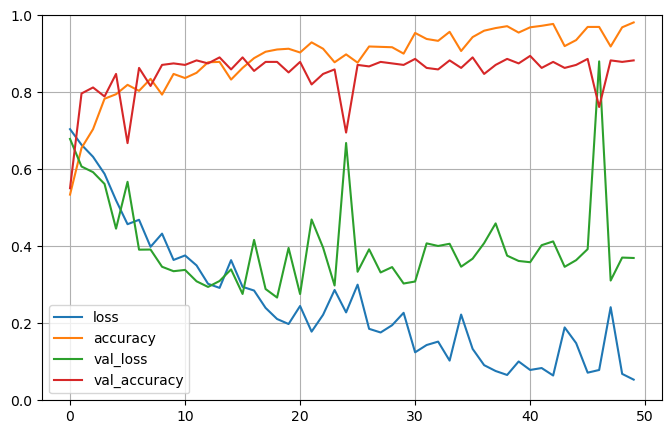

In [101]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

# PREDECTIONS AND ACCURACY

In [102]:
# Predict the labels for the test set
y_pred_encoded = modela.predict(X_test)
y_pred = np.argmax(y_pred_encoded, axis=1)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print(classification_report(y_test, y_pred))

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

10/10 [==============================] - 0s 6ms/step
Accuracy: 0.875
              precision    recall  f1-score   support

           0       0.93      0.83      0.88       171
           1       0.83      0.93      0.87       149

    accuracy                           0.88       320
   macro avg       0.88      0.88      0.87       320
weighted avg       0.88      0.88      0.88       320

Confusion Matrix:
[[142  29]
 [ 11 138]]


# USING ANN MODEL

In [29]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[64* 64*3,]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [83]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[64* 64*3]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 12288)             0         
                                                                 
 dense_42 (Dense)            (None, 300)               3686700   
                                                                 
 dense_43 (Dense)            (None, 100)               30100     
                                                                 
 dense_44 (Dense)            (None, 10)                1010      
                                                                 
Total params: 3717810 (14.18 MB)
Trainable params: 3717810 (14.18 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [84]:
hidden1 = model.layers[1]
hidden1.name

model.get_layer(hidden1.name) is hidden1

weights, biases = hidden1.get_weights()

In [85]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [86]:
history1 = model.fit(X_train, y_train, epochs=30,validation_split=0.2)

Epoch 1/30
32/32 [==============================] - 2s 40ms/step - loss: 0.8334 - accuracy: 0.6045 - val_loss: 1.0649 - val_accuracy: 0.5117
Epoch 2/30
32/32 [==============================] - 1s 28ms/step - loss: 0.6568 - accuracy: 0.6650 - val_loss: 0.5033 - val_accuracy: 0.8086
Epoch 3/30
32/32 [==============================] - 1s 29ms/step - loss: 0.6391 - accuracy: 0.6631 - val_loss: 0.6599 - val_accuracy: 0.5938
Epoch 4/30
32/32 [==============================] - 1s 27ms/step - loss: 0.5659 - accuracy: 0.7012 - val_loss: 0.7332 - val_accuracy: 0.5938
Epoch 5/30
32/32 [==============================] - 1s 30ms/step - loss: 0.5194 - accuracy: 0.7568 - val_loss: 0.5512 - val_accuracy: 0.6719
Epoch 6/30
32/32 [==============================] - 1s 29ms/step - loss: 0.5207 - accuracy: 0.7344 - val_loss: 0.3970 - val_accuracy: 0.8594
Epoch 7/30
32/32 [==============================] - 1s 29ms/step - loss: 0.5100 - accuracy: 0.7520 - val_loss: 0.4327 - val_accuracy: 0.8008
Epoch 8/30
32

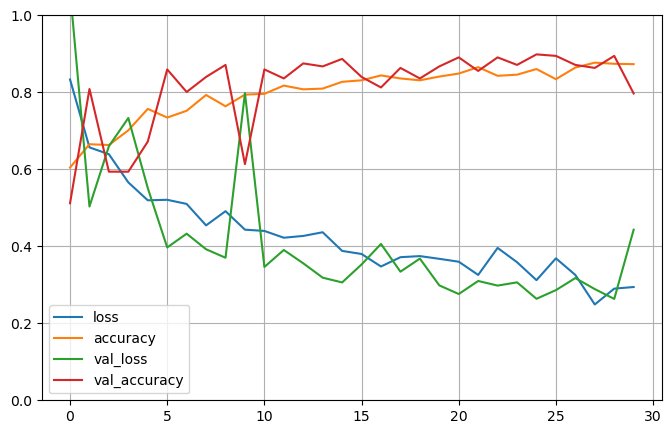

In [87]:
import pandas as pd

pd.DataFrame(history1.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [88]:
model.evaluate(X_test, y_test)

10/10 [==============================] - 0s 9ms/step - loss: 0.5051 - accuracy: 0.7625


[0.5051103830337524, 0.762499988079071]

In [89]:
y_pred2 = model.predict(X_test)
y_pred1 = np.argmax(y_pred2, axis=1)

10/10 [==============================] - 0s 8ms/step


In [90]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred1)
print("Accuracy:", accuracy)

# Print classification report
print(classification_report(y_test, y_pred1))

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred1)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.7625
              precision    recall  f1-score   support

           0       0.99      0.56      0.72       171
           1       0.66      0.99      0.80       149

    accuracy                           0.76       320
   macro avg       0.83      0.78      0.76       320
weighted avg       0.84      0.76      0.75       320

Confusion Matrix:
[[ 96  75]
 [  1 148]]


# Another model


In [91]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# Create a Sequential model
model1 = Sequential()

# Add an input layer with 64*64*3 neurons (flattened image size) and 'relu' activation
model1.add(Dense(128, activation='relu', input_shape=(64*64*3,)))

# Add multiple hidden layers with different activation functions
model1.add(Dense(256, activation='sigmoid'))  # Sigmoid activation
model1.add(Dense(128, activation='tanh'))     # Hyperbolic tangent (tanh) activation
model1.add(Dense(64, activation='elu'))       # Exponential Linear Unit (ELU) activation
model1.add(Dense(32, activation='selu'))      # Scaled Exponential Linear Unit (SELU) activation

# Add the output layer with the number of classes and 'softmax' activation
num_classes = len(label_encoder.classes_)  # Number of unique labels in your dataset
model1.add(Dense(num_classes, activation='softmax'))

# Compile the model with the Adam optimizer
optimizer = Adam()
model1.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Print model summary
model1.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_45 (Dense)            (None, 128)               1572992   
                                                                 
 dense_46 (Dense)            (None, 256)               33024     
                                                                 
 dense_47 (Dense)            (None, 128)               32896     
                                                                 
 dense_48 (Dense)            (None, 64)                8256      
                                                                 
 dense_49 (Dense)            (None, 32)                2080      
                                                                 
 dense_50 (Dense)            (None, 2)                 66        
                                                                 
Total params: 1649314 (6.29 MB)
Trainable params: 1649

In [92]:
# from keras.utils import to_categorical
# y_train_encoded = to_categorical(y_train)
# y_test_encoded = to_categorical(y_test)
# # Train the model on the training data
# history = model.fit(X_train, y_train_encoded, batch_size=50, epochs=50, validation_split=0.2)
batch_size = 50  # Adjust this based on your hardware and dataset size
epochs = 25      # You can adjust the number of epochs

history2 = model1.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)


Epoch 1/25


ValueError: in user code:

    File "C:\Users\DELL\anaconda3\lib\site-packages\keras\src\engine\training.py", line 1338, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\DELL\anaconda3\lib\site-packages\keras\src\engine\training.py", line 1322, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\DELL\anaconda3\lib\site-packages\keras\src\engine\training.py", line 1303, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\DELL\anaconda3\lib\site-packages\keras\src\engine\training.py", line 1081, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\DELL\anaconda3\lib\site-packages\keras\src\engine\training.py", line 1139, in compute_loss
        return self.compiled_loss(
    File "C:\Users\DELL\anaconda3\lib\site-packages\keras\src\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\DELL\anaconda3\lib\site-packages\keras\src\losses.py", line 142, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\DELL\anaconda3\lib\site-packages\keras\src\losses.py", line 268, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\DELL\anaconda3\lib\site-packages\keras\src\losses.py", line 2122, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "C:\Users\DELL\anaconda3\lib\site-packages\keras\src\backend.py", line 5560, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 2) are incompatible


# Trying Transformers


In [63]:

pip install tensorflow-addons

     ------------------------------------ 719.8/719.8 kB 658.2 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [74]:
import numpy as np
from vit_keras import vit

# Load your dataset here
# X_train, y_train, X_val, y_val, etc.

# Preprocess the data and labels (e.g., resizing, normalization, one-hot encoding)
# ...

# Create the Vision Transformer model
modelv = vit.vit_b16(
    image_size = 64*64, # Size of your input images
    activation = 'softmax',  # Activation function for the output layer
    pretrained = False,  # Set this to True if you want to use pre-trained weights
    include_top = True,  # Set this to False if you want to exclude the top classification layer
    pretrained_top = False  # Set this to True if you want to use pre-trained weights for the top classification layer
)

# Compile the model
modelv.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
modelv.summary()



Model: "vit-b16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 4096, 4096, 3)]   0         
                                                                 
 embedding (Conv2D)          (None, 256, 256, 768)     590592    
                                                                 
 reshape_6 (Reshape)         (None, 65536, 768)        0         
                                                                 
 class_token (ClassToken)    (None, 65537, 768)        768       
                                                                 
 Transformer/posembed_input  (None, 65537, 768)        50332416  
  (AddPositionEmbs)                                              
                                                                 
 Transformer/encoderblock_0  ((None, 65537, 768),      7087872   
  (TransformerBlock)          (None, 12, None, None)       

In [78]:
# Fit the model to the training data
batch_size = 32  # Adjust this based on your hardware and dataset size
epochs = 10      # You can adjust the number of epochs

history = modelv.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)


Epoch 1/10


ValueError: in user code:

    File "C:\Users\DELL\anaconda3\lib\site-packages\keras\src\engine\training.py", line 1338, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\DELL\anaconda3\lib\site-packages\keras\src\engine\training.py", line 1322, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\DELL\anaconda3\lib\site-packages\keras\src\engine\training.py", line 1303, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\DELL\anaconda3\lib\site-packages\keras\src\engine\training.py", line 1080, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\DELL\anaconda3\lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\DELL\anaconda3\lib\site-packages\keras\src\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "vit-b16" is incompatible with the layer: expected shape=(None, 4096, 4096, 3), found shape=(32, 12288)
